In [3]:
%load_ext autoreload
%autoreload 2
import os

os.chdir('..')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from src import *
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [7]:
files = [
    '20190819-Kutna Hora-L1-out-MVI_0007',
    '20190819-Kutna Hora-L3-in-MVI_0005',
    '20190819-Kutna Hora-L3-out-MVI_0008',
    '20190819-Kutna Hora-L4-in-MVI_0013',
    '20190819-Kutna Hora-L6-out-MVI_0017',
    '20190819-Kutna Hora-L7-out-MVI_0032',
    '20190819-Kutna Hora-L8-in-MVI_0045',
    '20190819-Kutna Hora-L9-in-MVI_0043',
    '20190819-Kutna Hora-L10-out-SDV_1888',
    '20190819-Kutna Hora-L13-in-MVI_0006',
    '20190819-Kutna Hora-L13-out-MVI_0018',
    '20190819-Kutna Hora-L14-out-MVI_0005',
    '20190819-Kutna Hora-L15-out-MVI_0012',
    '20190819-Kutna Hora-L18-in-MVI_0030',
    '20190819-Ricany-L2-in-MVI_0006',
    '20190819-Ricany-L2-out-MVI_0005',
    '20190819-Ricany-L3-in-MVI_0006',
    '20190819-Ricany-L6-in-MVI_0008',
    '20190819-Ricany-L6-out-MVI_0011',
    '20190819-Ricany-L7-in-MVI_0008',
    '20190819-Ricany-L7-out-MVI_0013',
    '20190819-Ricany-L8-in-MVI_0009',
    '20190819-Ricany-L8-out-MVI_0013',
    '20190819-Ricany-L9-in-MVI_0008',
    '20190819-Ricany-L9-out-MVI_0011'
]

window_length = 6
split_ratio = 0.75

datapool = DataPool(files, window_length, split_ratio, tqdm=tqdm)

Video loading:   0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

20190819-Kutna Hora-L1-out-MVI_0007
[0 1 2 3 4]
20190819-Kutna Hora-L3-in-MVI_0005
[0 1 2 3 4]
20190819-Kutna Hora-L3-out-MVI_0008
[0 1 2 3 4 5]
20190819-Kutna Hora-L4-in-MVI_0013
[0 1 2 3 4]
20190819-Kutna Hora-L6-out-MVI_0017
[0 1 4]
20190819-Kutna Hora-L7-out-MVI_0032
[0 1 2]
20190819-Kutna Hora-L8-in-MVI_0045
[0 1 2 3 4 5]
20190819-Kutna Hora-L9-in-MVI_0043
[0 1 2 3 4]
20190819-Kutna Hora-L10-out-SDV_1888
[0 1 2 3 4]
20190819-Kutna Hora-L13-in-MVI_0006
[0 1]
20190819-Kutna Hora-L13-out-MVI_0018
[0 1 2]
20190819-Kutna Hora-L14-out-MVI_0005
[0 1 2 3]
20190819-Kutna Hora-L15-out-MVI_0012
[0 1 2]
20190819-Kutna Hora-L18-in-MVI_0030
[0 1 2 3 4 5 6]
20190819-Ricany-L2-in-MVI_0006
[0 1 2 3 4 5 6]
20190819-Ricany-L2-out-MVI_0005
[0 1 2 3 4 5]
20190819-Ricany-L3-in-MVI_0006
[0 1 2 3 4 5 6]
20190819-Ricany-L6-in-MVI_0008
[0 1 2 3 4 5 6 7]
20190819-Ricany-L6-out-MVI_0011
[0 1 2 3 4 5 6 8]
20190819-Ricany-L7-in-MVI_0008
[0 1 2 3 4 5 6]
20190819-Ricany-L7-out-MVI_0013
[0 1 2 3 4]
20190819-Rican

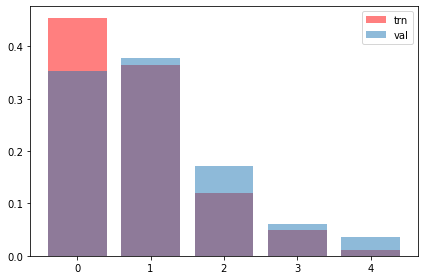

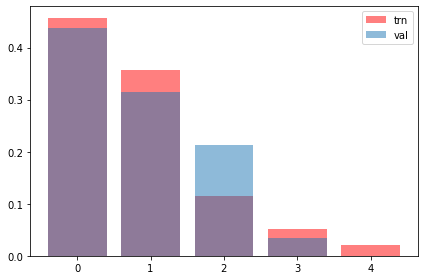

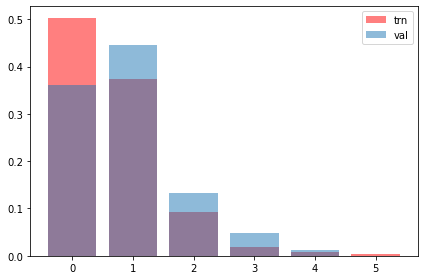

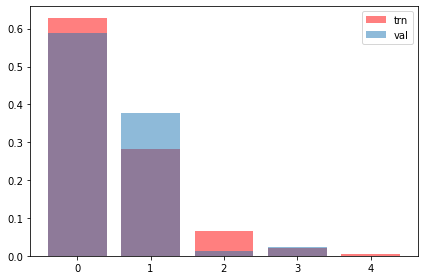

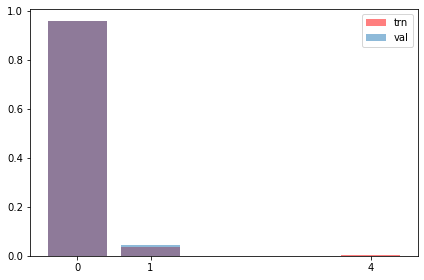

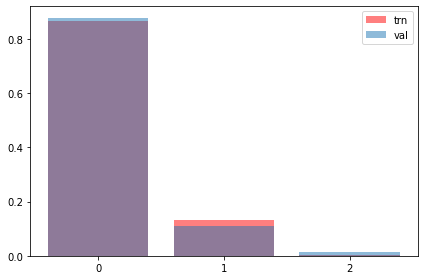

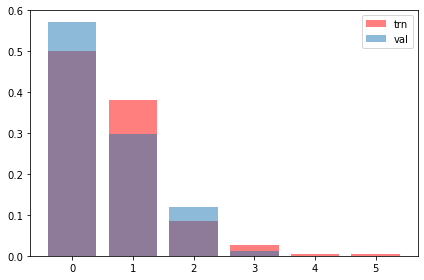

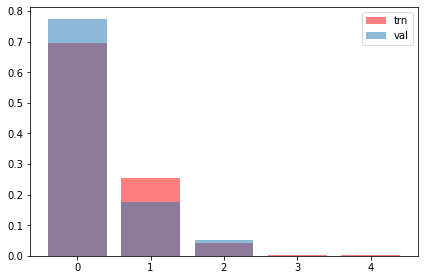

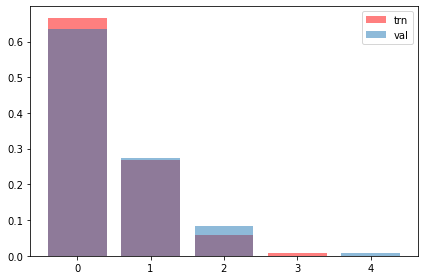

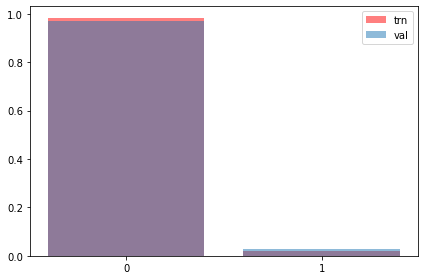

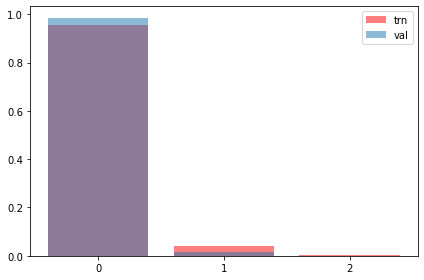

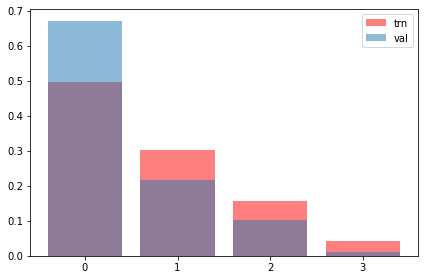

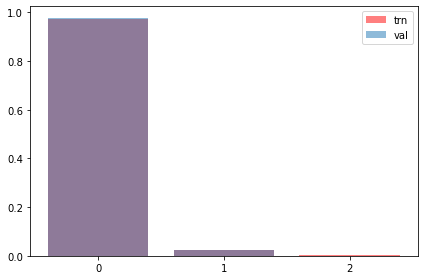

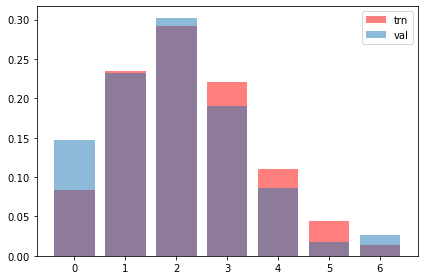

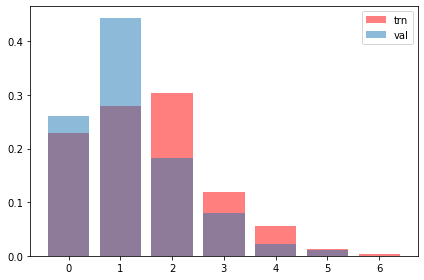

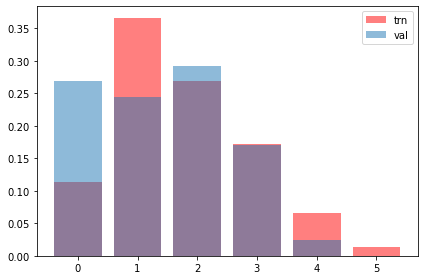

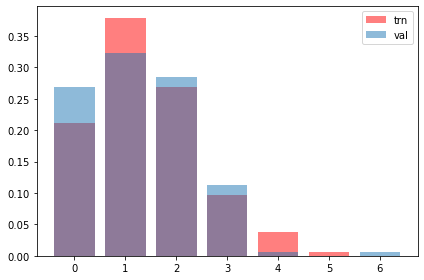

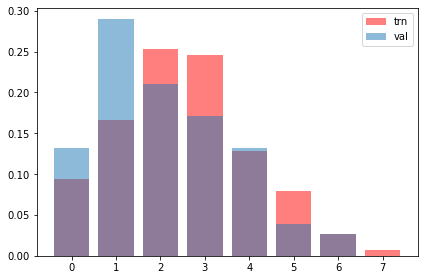

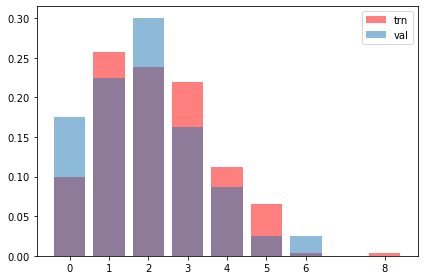

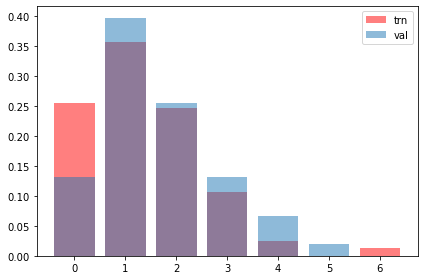

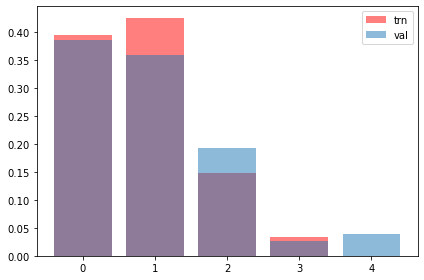

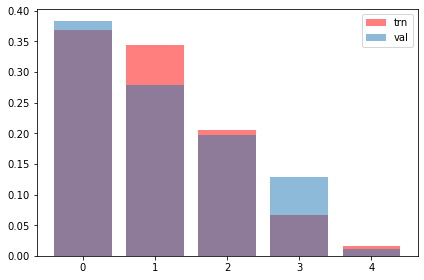

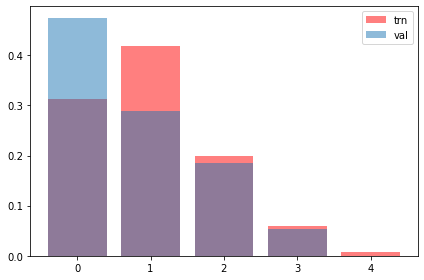

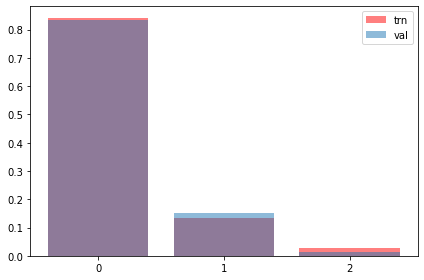

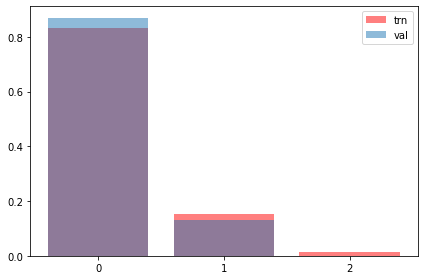

In [44]:
def get_labels_counts(video, is_trn):
    events = video.get_events(is_trn=is_trn)
    trn_from_time, trn_till_time = video.get_from_till_time(is_trn=is_trn)
    
    X = np.arange(trn_from_time, trn_till_time, window_length)
    X = np.vstack([X[:-1], X[1:]]).T

    events_in_windows = []
    for events_from_time, events_till_time in X:
        events_in_window = np.sum((events >= events_from_time) & (events < events_till_time))
        events_in_windows.append(events_in_window)

    labels, counts = np.unique(events_in_windows, return_counts=True)
    counts = counts / counts.sum() 
    return labels, counts

for video in tqdm(datapool):
    print(video.file)

    fig, ax = plt.subplots()
    
    labels1, counts = get_labels_counts(video, True)
    ax.bar(labels1, counts, align='center', alpha=0.5, label='trn', color='r')
    
    labels2, counts = get_labels_counts(video, False)
    ax.bar(labels2, counts, align='center', alpha=0.5, label='val')
    
    labels = np.union1d(labels1, labels2)
    labels = np.sort(labels)
    ax.set_xticks(labels);
    
    plt.tight_layout()
    plt.legend()
    plt.savefig(f'plots/trn_val_events_distribution/{video.file}.jpg')